In [7]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Load cleaned data
import pandas as pd
df = pd.read_csv("data/cleaned_data.csv")

# Write heavy chains to a FASTA for alignment
hc_fasta = "data/heavy_chains.fasta"
records = []

for _, r in df.iterrows():
    sid = str(r["Sample"])
    seq = str(r["VDJ_AA_H"])
    records.append(SeqRecord(Seq(seq), id=sid, description=""))

SeqIO.write(records, hc_fasta, "fasta")
print(f"Wrote {len(records)} heavy chains to {hc_fasta}")

Wrote 606 heavy chains to data/heavy_chains.fasta


In [14]:
!mafft --auto data/heavy_chains.fasta > data/heavy_chains_aligned.fasta


/bin/bash: line 1: mafft: command not found


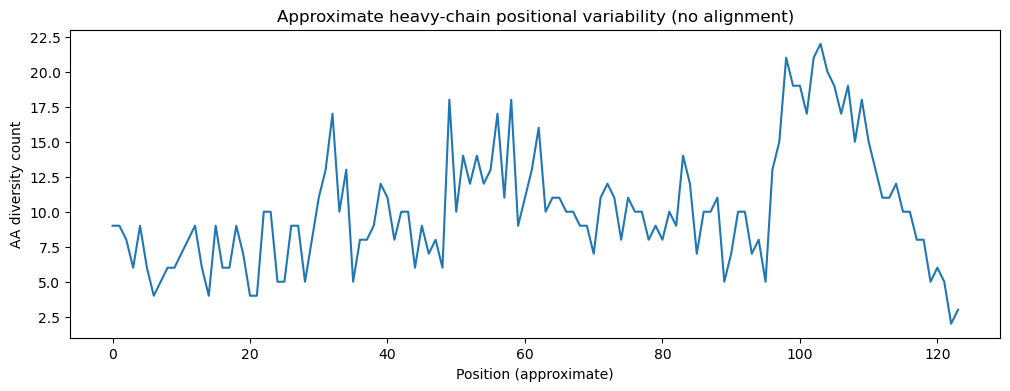

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("data/cleaned_data.csv")

# Extract heavy chains
seqs = df["VDJ_AA_H"].astype(str).tolist()

# Normalize sequences to same length via padding (right-pad with "-")
max_len = max(len(s) for s in seqs)
padded = [s.ljust(max_len, "-") for s in seqs]

# Compute diversity per position
diversity = []
for i in range(max_len):
    col = [s[i] for s in padded]
    counts = Counter(col)
    diversity.append(len(counts))  # simple diversity metric

# Plot
plt.figure(figsize=(12,4))
plt.plot(diversity)
plt.xlabel("Position (approximate)")
plt.ylabel("AA diversity count")
plt.title("Approximate heavy-chain positional variability (no alignment)")
plt.show()


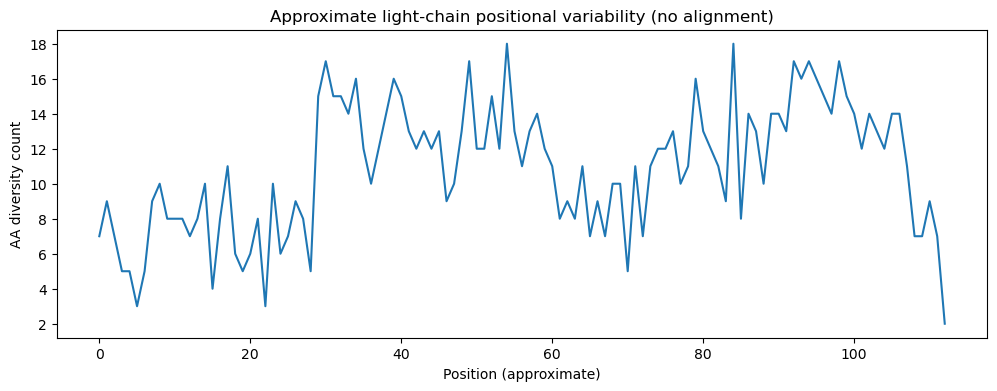

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("data/cleaned_data.csv")

seqs = df["VJ_AA_K"].astype(str).tolist()
max_len = max(len(s) for s in seqs)
padded = [s.ljust(max_len, "-") for s in seqs]

diversity = []
for i in range(max_len):
    col = [s[i] for s in padded]
    diversity.append(len(set(col)))

plt.figure(figsize=(12,4))
plt.plot(diversity)
plt.xlabel("Position (approximate)")
plt.ylabel("AA diversity count")
plt.title("Approximate light-chain positional variability (no alignment)")
plt.show()


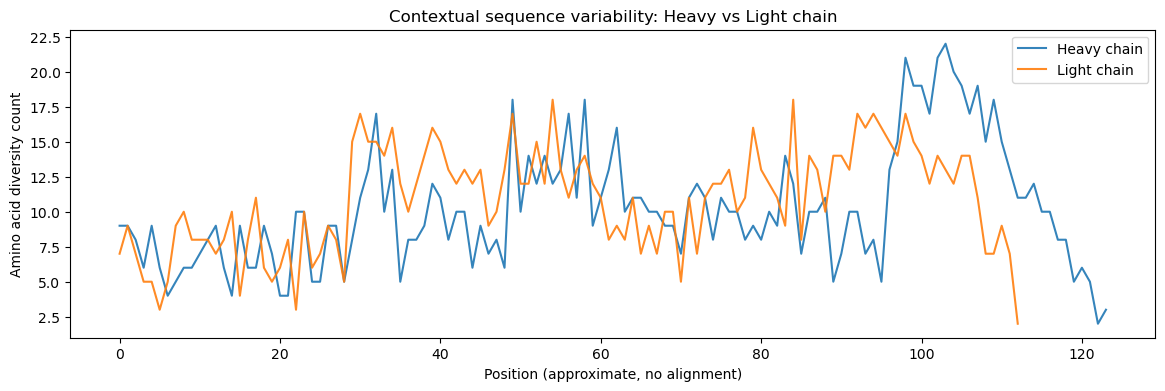

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load cleaned data
df = pd.read_csv("data/cleaned_data.csv")

def positional_diversity(seqs):
    max_len = max(len(s) for s in seqs)
    padded = [s.ljust(max_len, "-") for s in seqs]
    diversity = []
    for i in range(max_len):
        col = [s[i] for s in padded]
        diversity.append(len(Counter(col)))
    return diversity

# Compute diversity
hc_div = positional_diversity(df["VDJ_AA_H"].astype(str).tolist())
lc_div = positional_diversity(df["VJ_AA_K"].astype(str).tolist())

# Plot together
plt.figure(figsize=(14,4))
plt.plot(hc_div, label="Heavy chain", alpha=0.9)
plt.plot(lc_div, label="Light chain", alpha=0.9)

plt.xlabel("Position (approximate, no alignment)")
plt.ylabel("Amino acid diversity count")
plt.title("Contextual sequence variability: Heavy vs Light chain")
plt.legend()
plt.show()


As expected, sequence diversity is concentrated in the heavy chain (particularly in the CDRH3) while the light chain is more constrained. This motivates focusing on structure-level analysis rather than sequence-only comparisons.